# Exploratory Data Analysis

Use the code below to explore the raw timeseries data. Come up with 5 observations that might help inform an algorithm that you build using this data.

## Imports

In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Load Data

In [2]:
data_dir = 'data'
filenames = [os.path.splitext(f)[0] for f in sorted(os.listdir(data_dir))]
fs = 256

In [3]:
data = []
for f in filenames:
    subject = f.split('_')[0]
    activity = f.split('_')[1]
    path = os.path.join(data_dir, f + '.csv')
    df = pd.read_csv(path)
    df = df.loc[: df.last_valid_index()]
    data.append((subject, activity, df))

## Offline

Working in an offline notebook on your local machine is probably easier and faster for this exercise. 
Use the plotting code below to visualize the data.

### Pick a backend

You can only pick one matplotlib backend so delete two lines of code from the cell below before running it.

In [12]:
# matplotlib backend for windows
%matplotlib QT  

### Sequentially Plot the Data

You can interact with the plots with your mouse. Press any key on the keyboard to go to the next plot.

In [13]:
for subject, activity, df in sorted(data, key=lambda x: x[1]):
    ts = np.arange(len(df)) / fs
    plt.clf()
    plt.plot(ts, df.accx, label='x')
    plt.plot(ts, df.accy, label='y')
    plt.plot(ts, df.accz, label='z')
    plt.title('{}_{}'.format(subject, activity))
    plt.legend(loc='best')
    plt.ylim((-25, 25))
    plt.draw()
    while not plt.waitforbuttonpress():
        pass

## Plot in notebook

Inside a VM you won't be able to open a new window so you have to plot the data inline. It's a lot of data to plot interactively so you may have to be patient. After examining the data from one activity class it's a good idea to clear that cell's output so you free up memory in the notebook. Click on the cell with the plots, then in the top menu `Cell` > `Current Outputs` > `Clear`

In [14]:
%matplotlib inline

`mpld3` will allow you to interact with the plots but if you run the following line of code the workspace could crash while generating the graphs. It is **highly** suggested you run the following data **without** `mpld3` and if you are interested in a particular graph to enable this and generate the graph individually. 

In [15]:
#import mpld3
#mpld3.enable_notebook()

#### Plot biking data

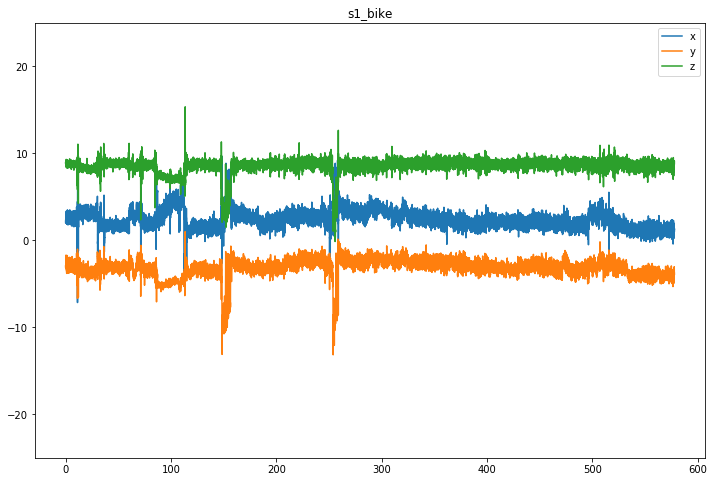

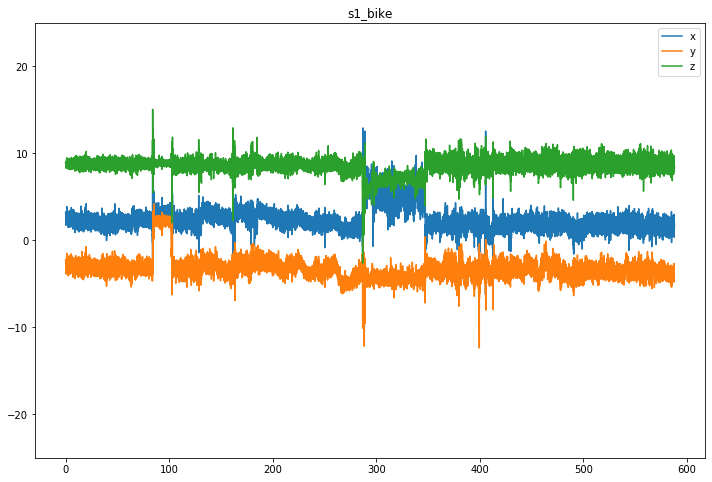

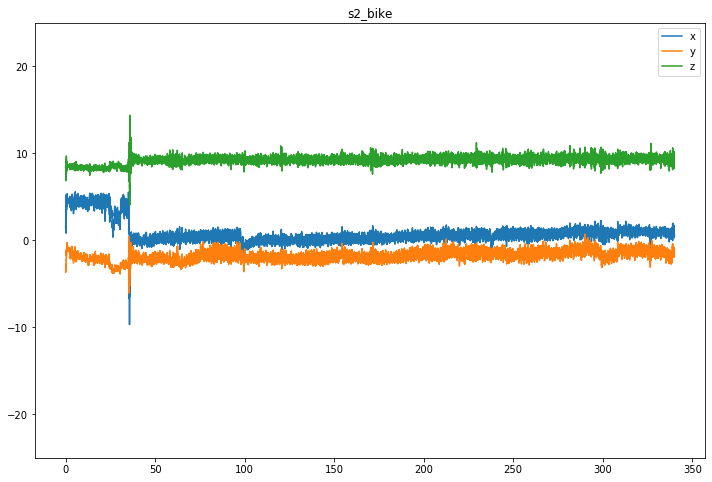

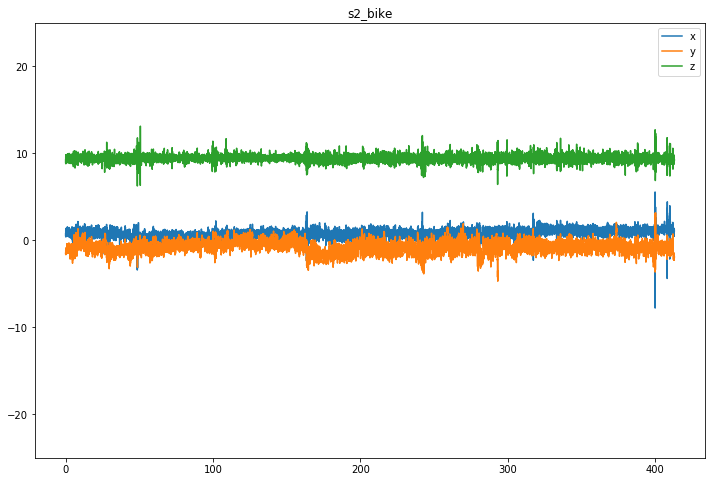

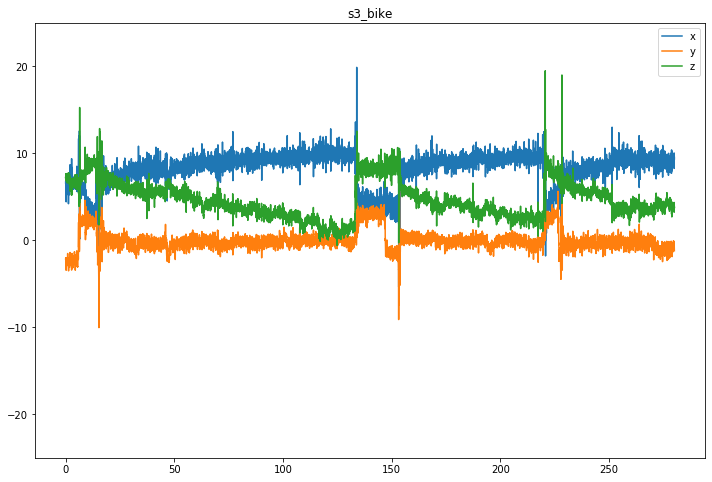

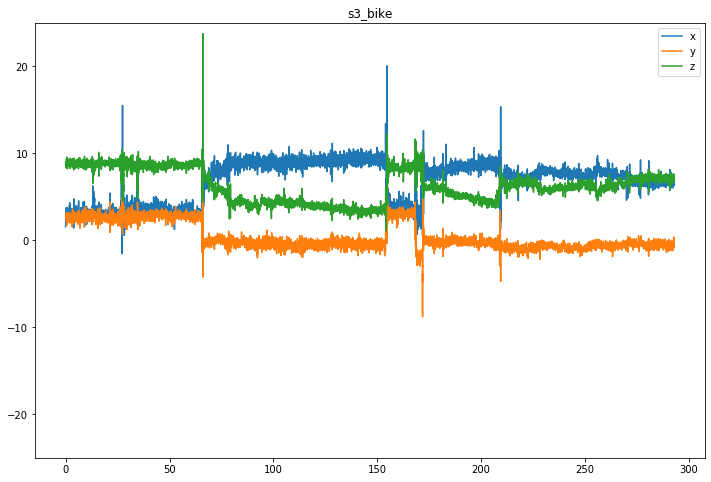

In [16]:
for subject, activity, df in data:
    if activity != 'bike':
        continue
    ts = np.arange(len(df)) / fs
    plt.figure(figsize=(12, 8))
    plt.plot(ts, df.accx, label='x')
    plt.plot(ts, df.accy, label='y')
    plt.plot(ts, df.accz, label='z')
    plt.title('{}_{}'.format(subject, activity))
    plt.legend(loc='best')
    plt.ylim((-25, 25))
    plt.draw() 

#### Plot running data

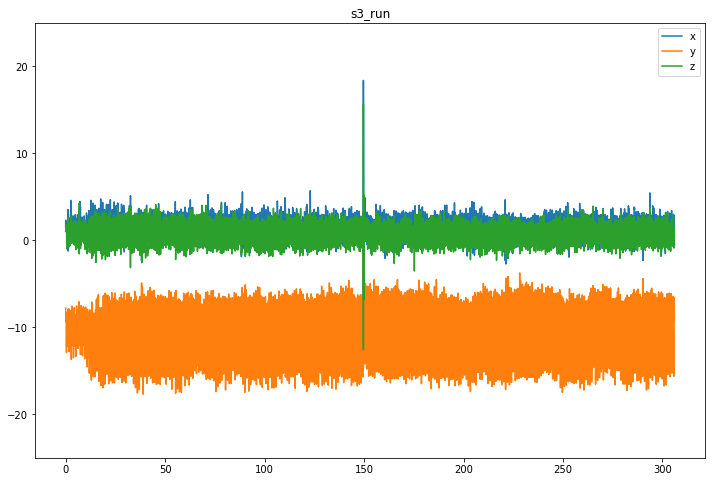

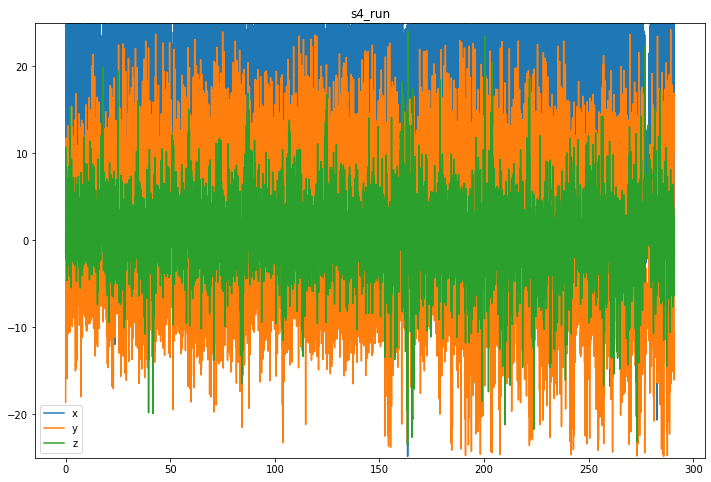

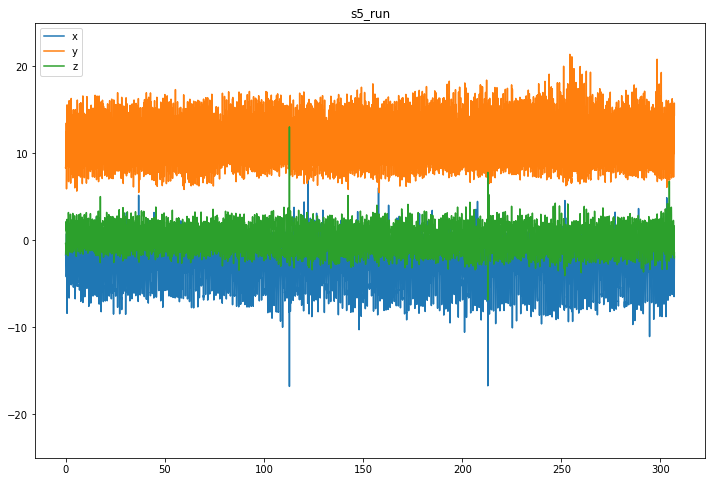

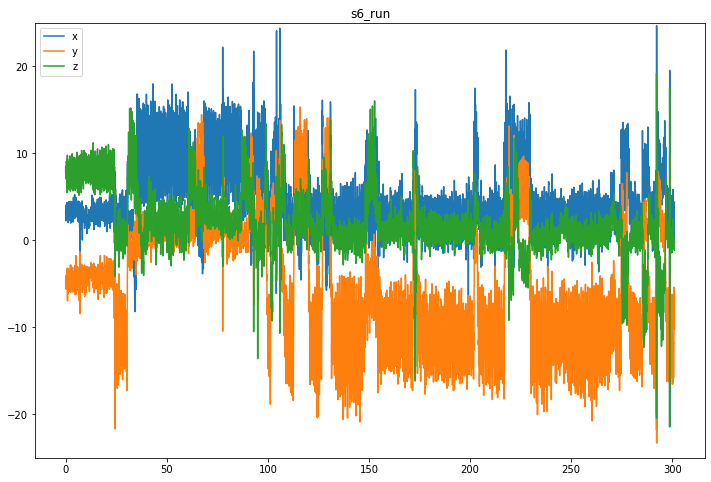

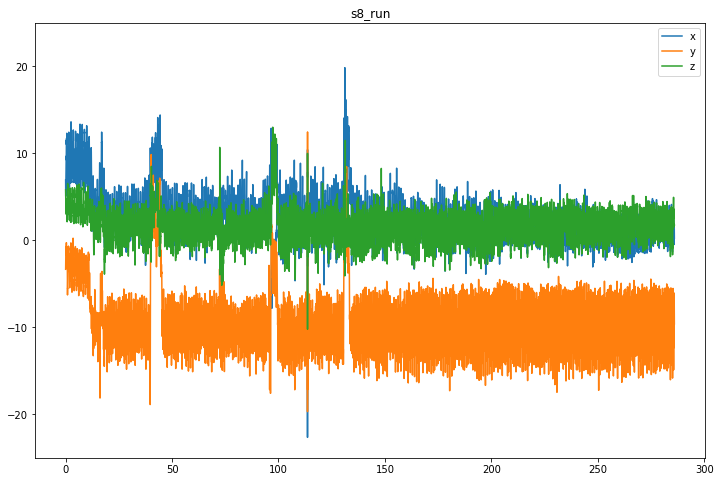

In [17]:
for subject, activity, df in sorted(data, key=lambda x: x[1]):
    if activity != 'run':
        continue
    ts = np.arange(len(df)) / fs
    plt.figure(figsize=(12, 8))
    plt.plot(ts, df.accx, label='x')
    plt.plot(ts, df.accy, label='y')
    plt.plot(ts, df.accz, label='z')
    plt.title('{}_{}'.format(subject, activity))
    plt.legend(loc='best')
    plt.ylim((-25, 25))
    plt.draw()

#### Plot walking data

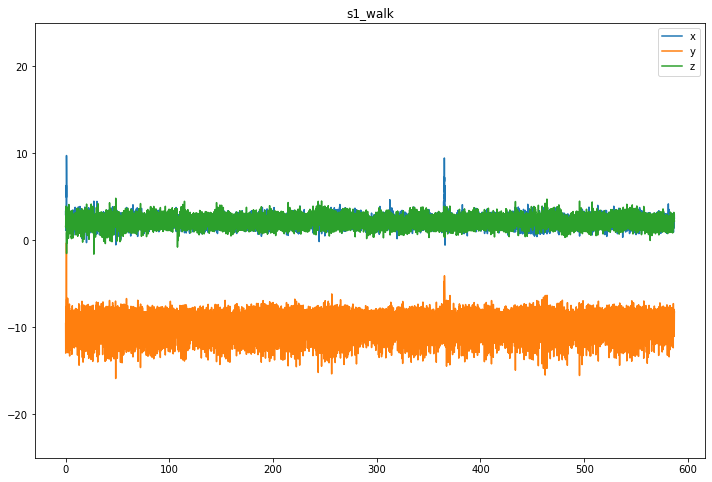

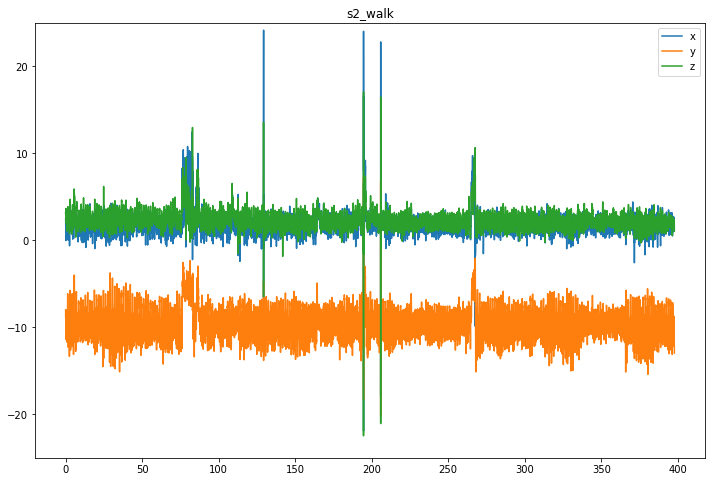

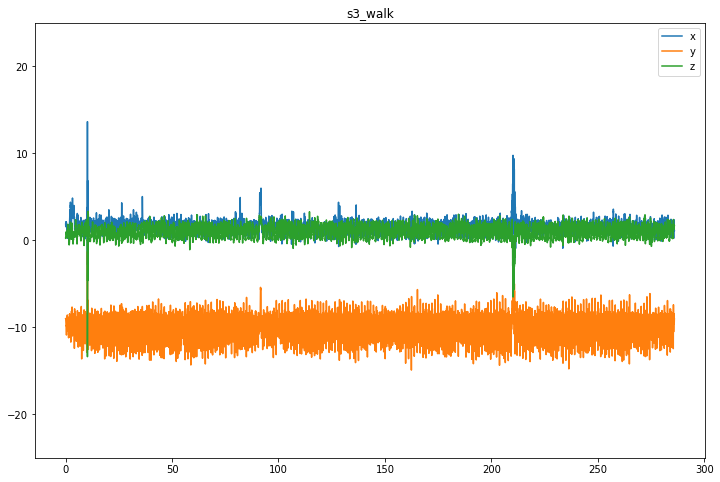

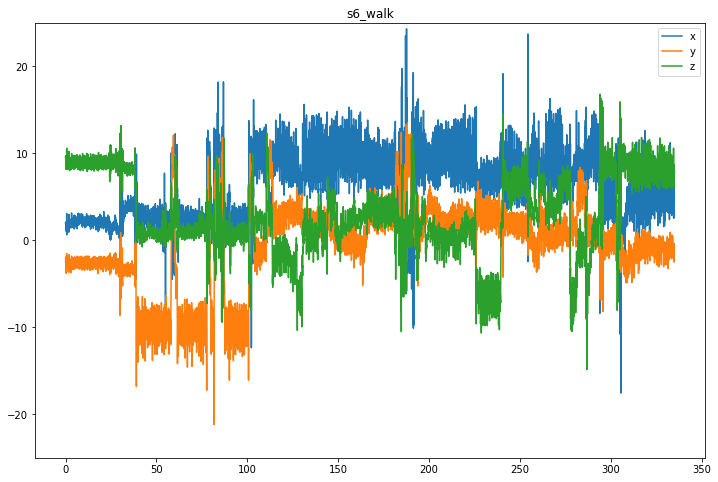

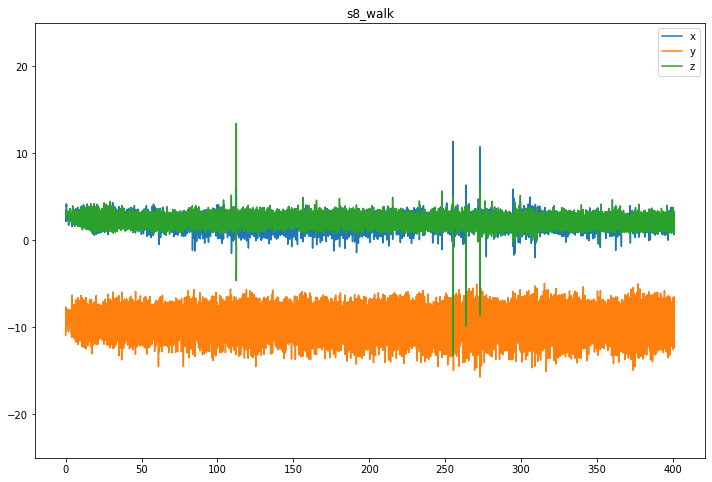

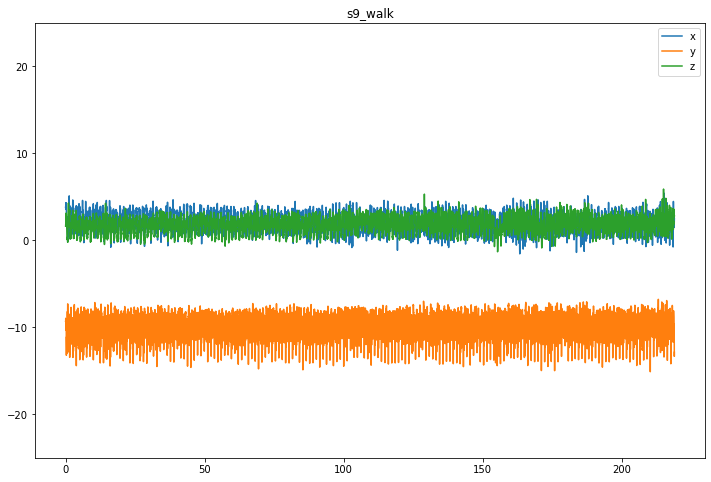

In [18]:
for subject, activity, df in sorted(data, key=lambda x: x[1]):
    if activity != 'walk':
        continue
    ts = np.arange(len(df)) / fs
    plt.figure(figsize=(12, 8))  
    plt.plot(ts, df.accx, label='x')
    plt.plot(ts, df.accy, label='y')
    plt.plot(ts, df.accz, label='z')
    plt.title('{}_{}'.format(subject, activity))
    plt.legend(loc='best')
    plt.ylim((-25, 25))
    plt.draw()

## Observations

What do you notice about the data that might be helpful when we start building a classifier?
**Answer** I can notice from plots above that bike measurements sort of not overlap between signals. On the other hand running and waling overlap between acclerometer z and x. However, running differs from walking in that running has more amplitude or energy than walking. 